In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api

In [2]:
dataset=pd.read_excel("Airlines+Data.xlsx")

In [3]:
dataset.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
dataset.isna().any()

Month         False
Passengers    False
dtype: bool

In [5]:
dataset.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
dataset.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
dataset['Passengers'].skew()

0.6373753552984904

In [9]:
dataset['Passengers'].kurt()

-0.12812093729688012

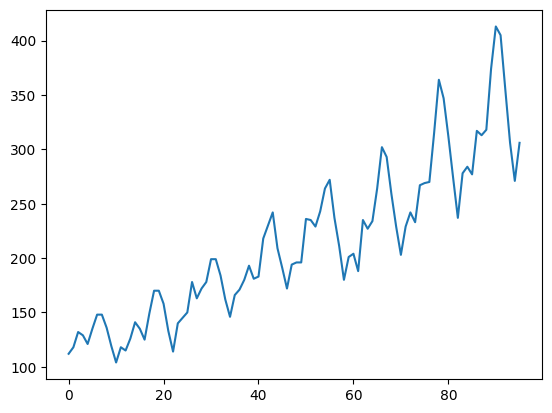

In [10]:
dataset.Passengers.plot()
plt.show()

In [11]:
dataset.nunique()

Month         96
Passengers    80
dtype: int64

###Renaming month as date

In [12]:
dataset.rename({'Month':'Date'},axis=1,inplace=True)
dataset

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

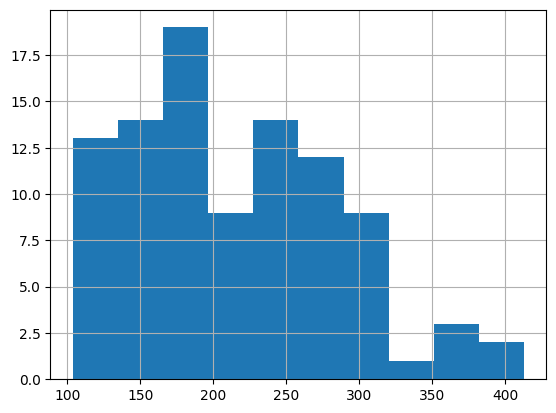

In [13]:
dataset.Passengers.hist()

<Axes: ylabel='Density'>

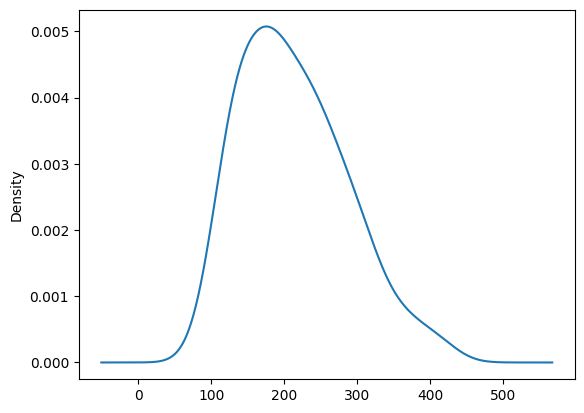

In [14]:
dataset['Passengers'].plot(kind='kde')

###Lag Plot

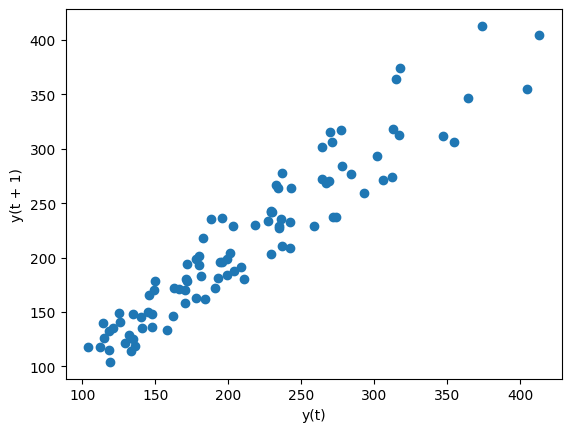

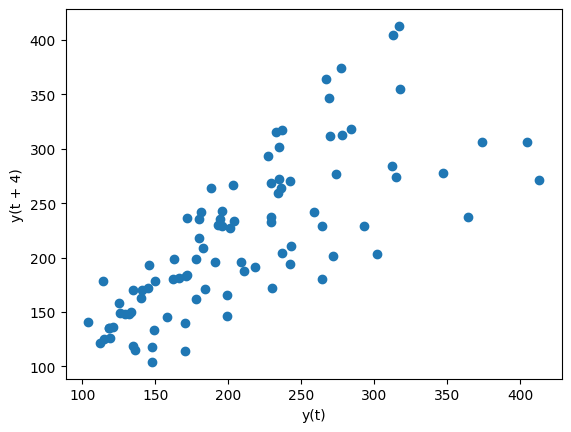

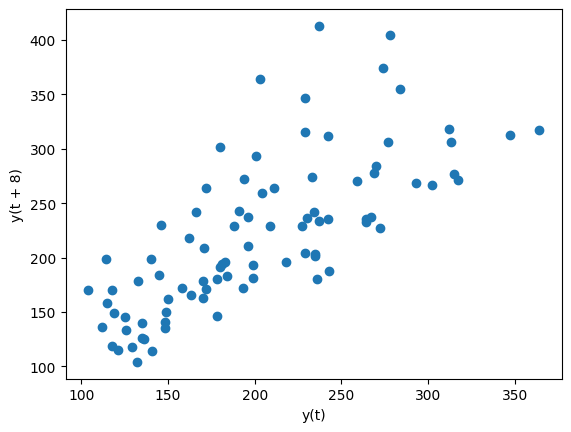

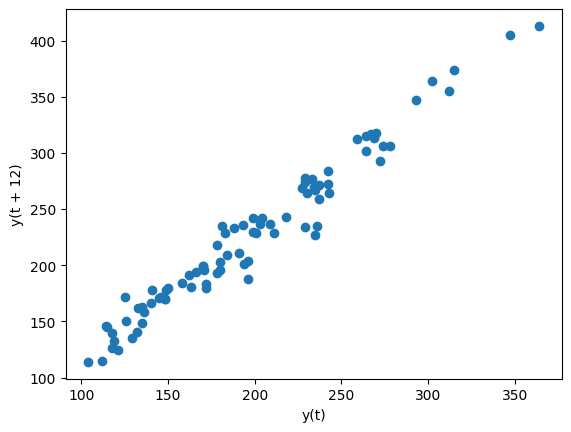

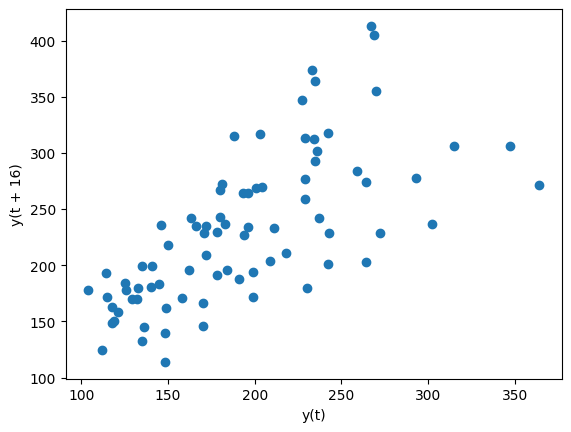

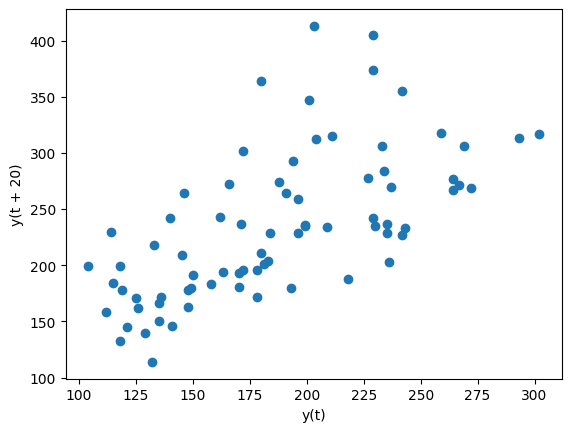

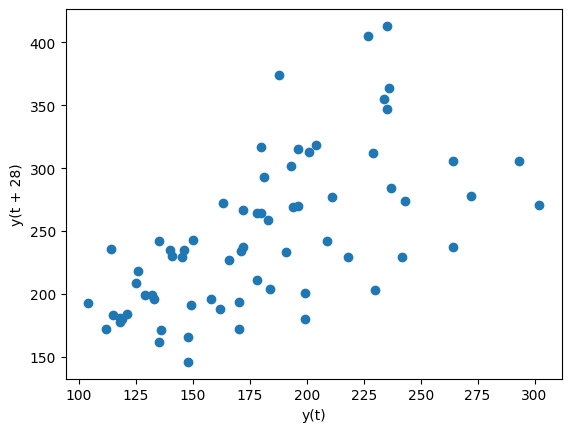

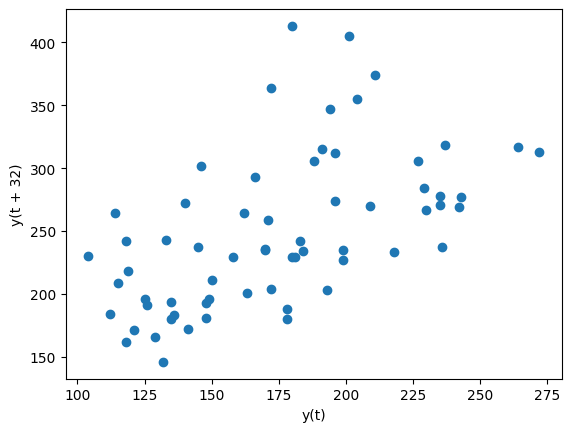

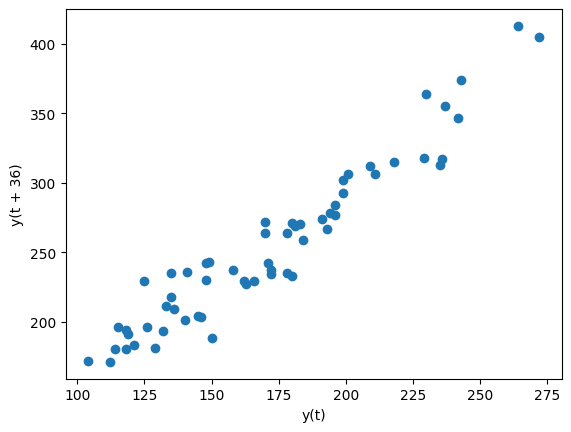

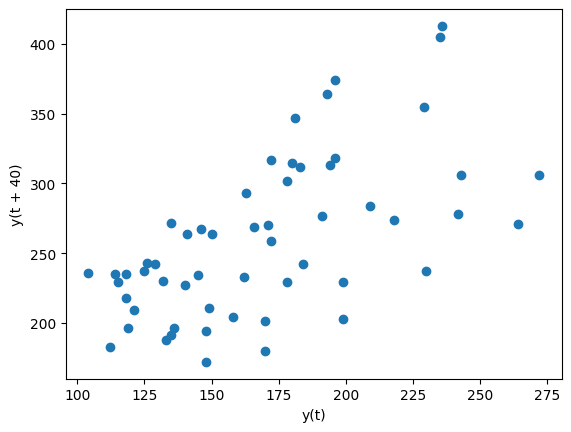

In [15]:
from pandas.plotting import lag_plot
for i in [1,4,8,12,16,20,28,32,36,40]:
  lag_plot(dataset['Passengers'],lag=i)
  plt.show()

###Moving Average

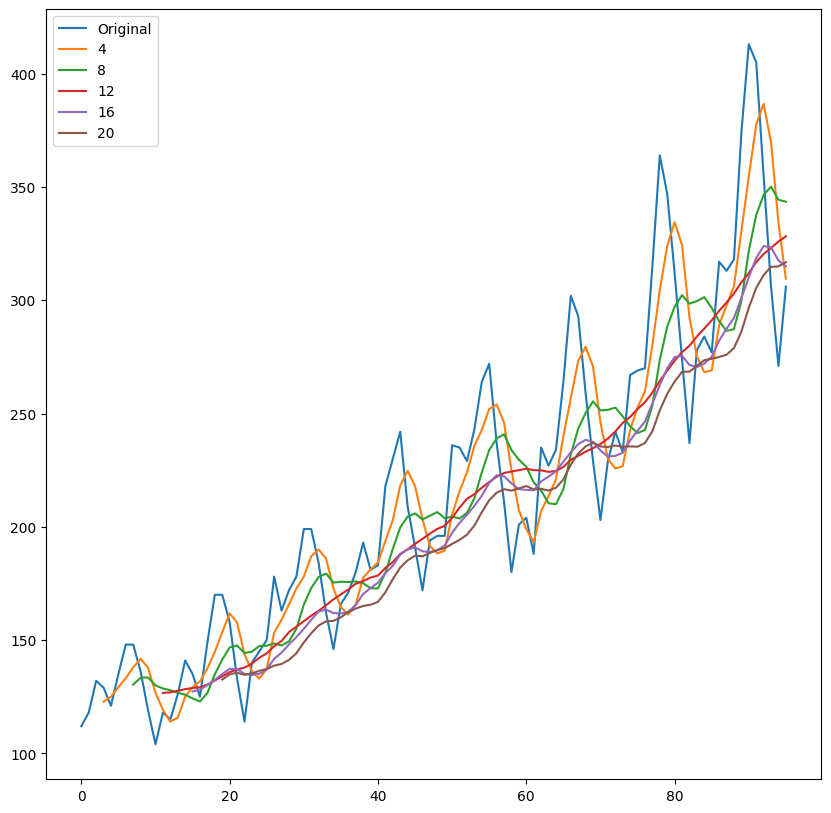

In [16]:
plt.figure(figsize=(10,10))
dataset['Passengers'].plot(label='Original')
for i in range(4,21,4):
  dataset['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")
plt.show()

In [17]:
d=dataset['Passengers']

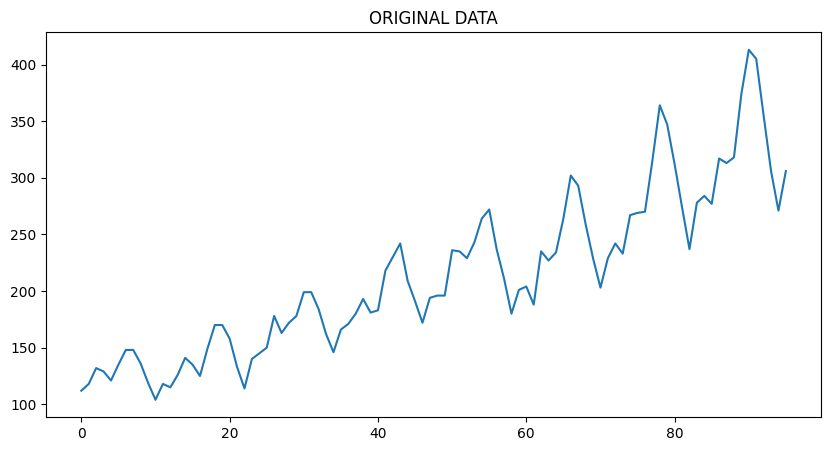

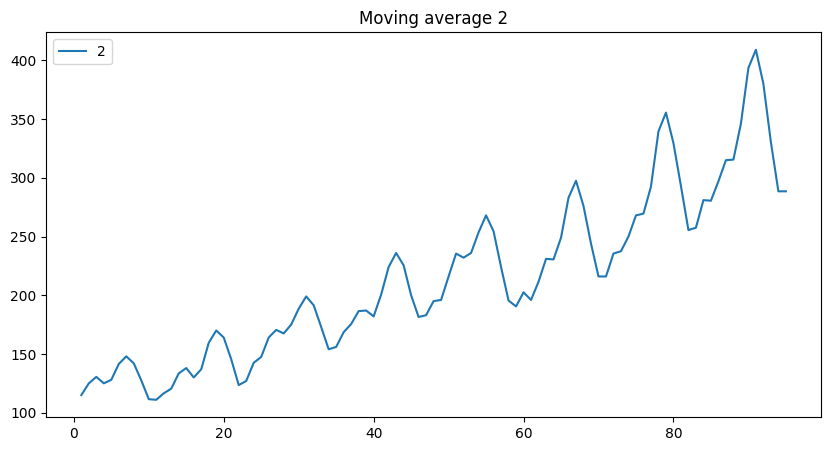

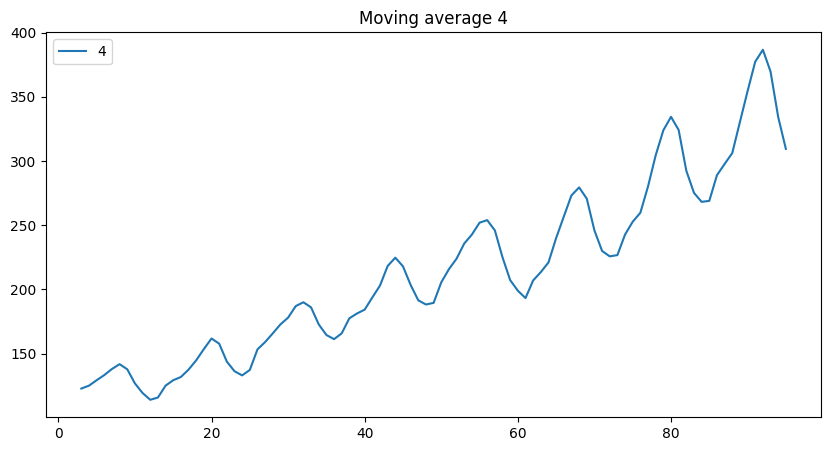

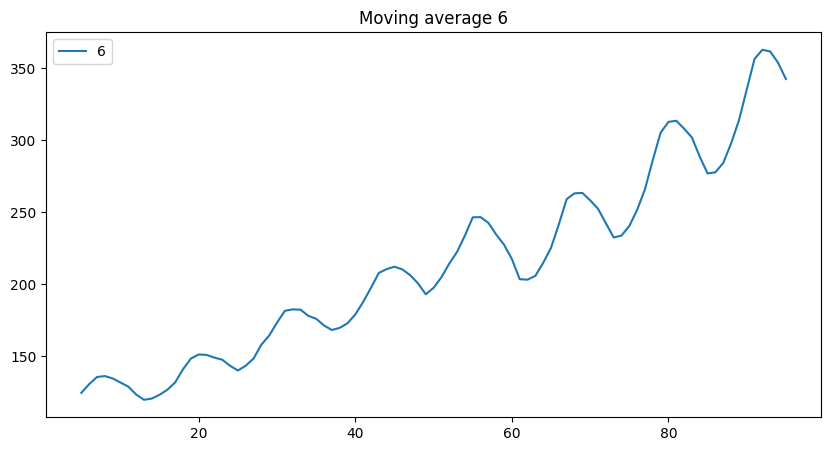

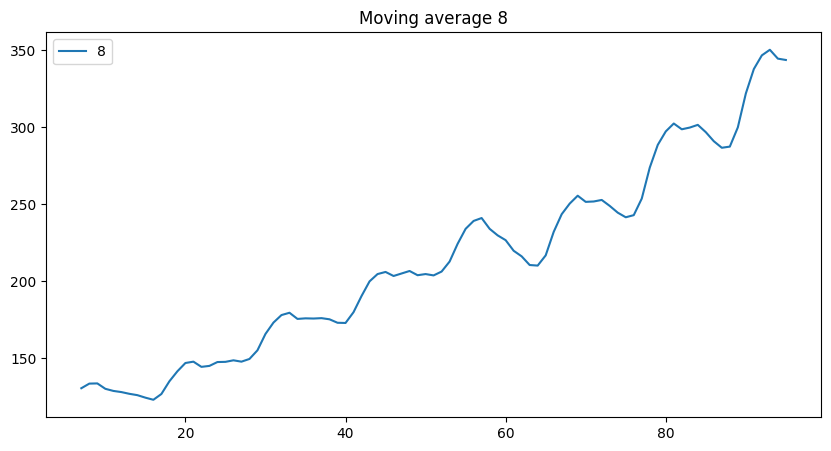

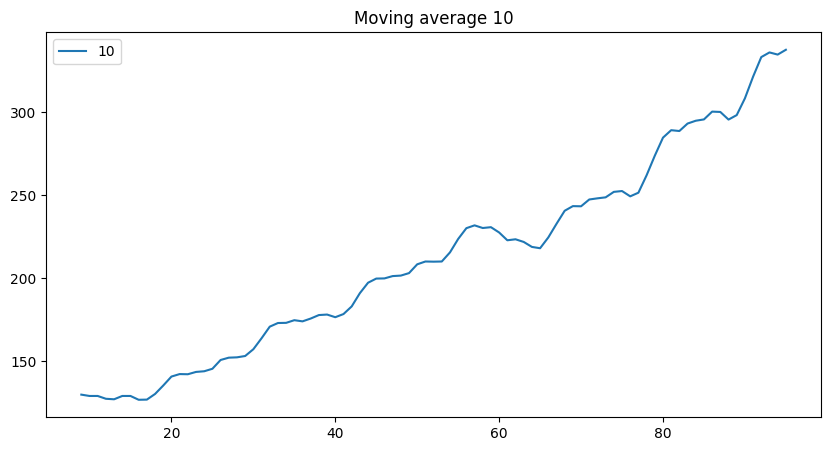

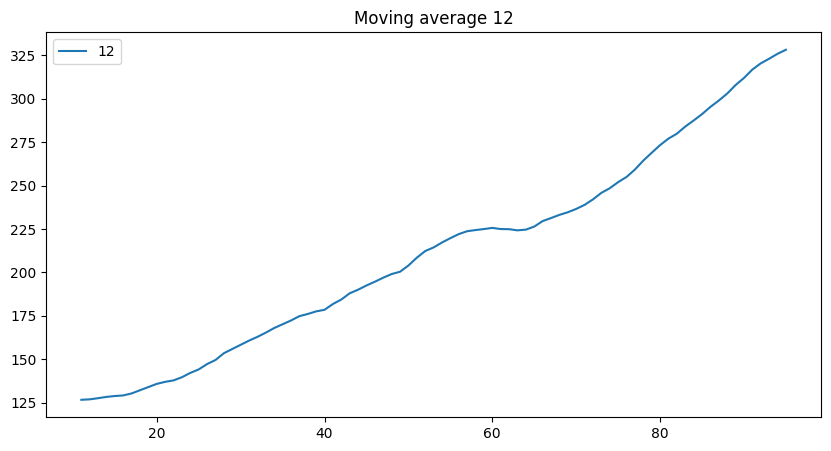

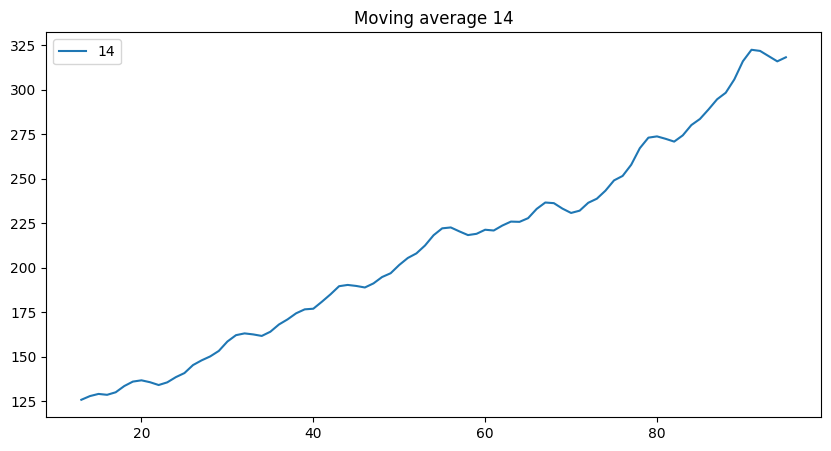

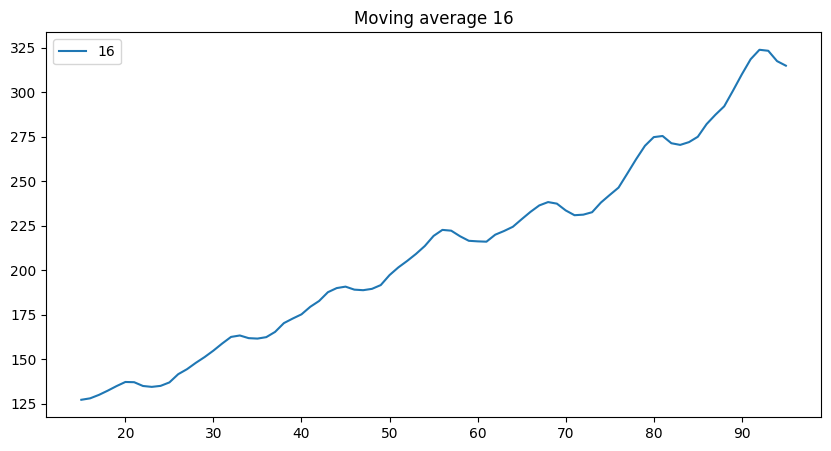

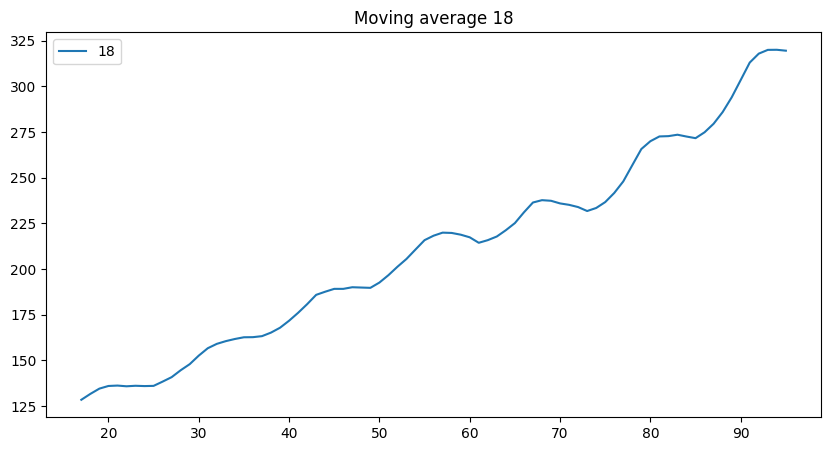

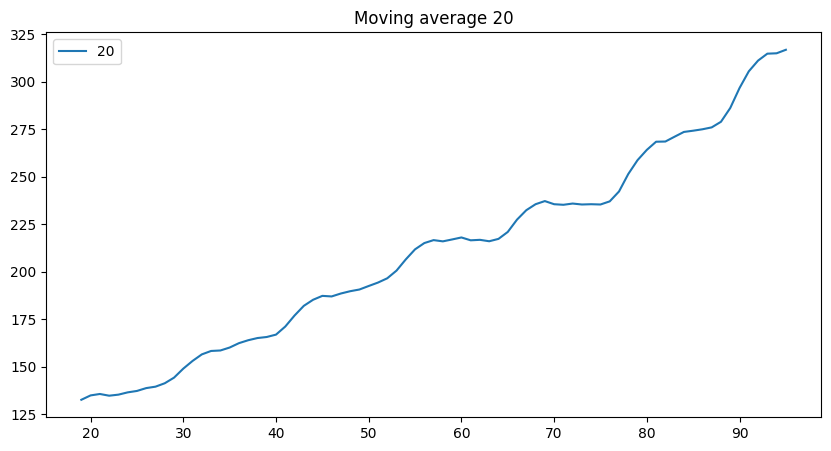

In [18]:
plt.figure(figsize=(10,5))
d.plot(label="original data")
plt.title("ORIGINAL DATA")
for i in range(2,21,2):
  plt.figure(figsize=(10,5))
  d.rolling(i).mean().plot(label=str(i))
  plt.title("Moving average "+str(i))
  plt.legend(loc='best')
  plt.show()

<Figure size 1000x1000 with 0 Axes>

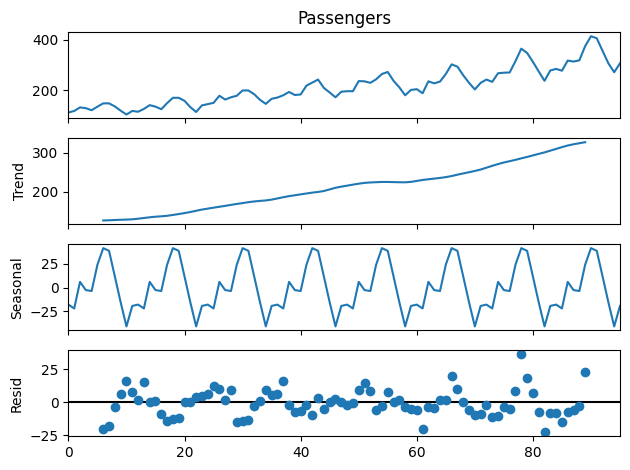

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add=seasonal_decompose(d,period=12)
plt.figure(figsize=(10,10))
decompose_ts_add.plot()
plt.show()

###ACF AND PACF PLOTS

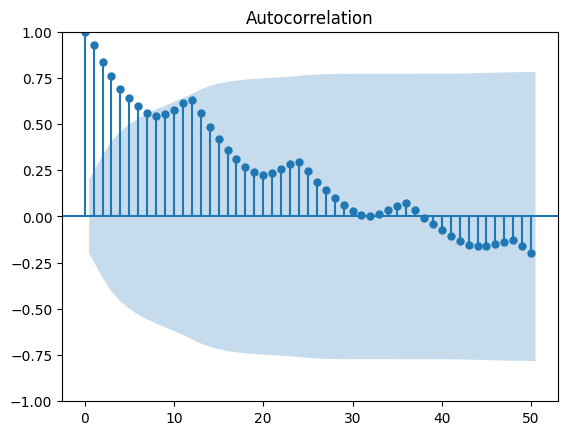

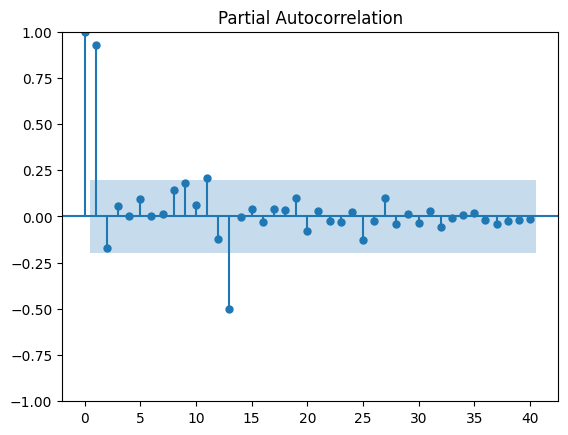

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(d,lags=50)
tsa_plots.plot_pacf(d,lags=40)
plt.show()

In [21]:
airlines=dataset.copy()
airlines.set_index("Date",inplace=True)
airlines

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


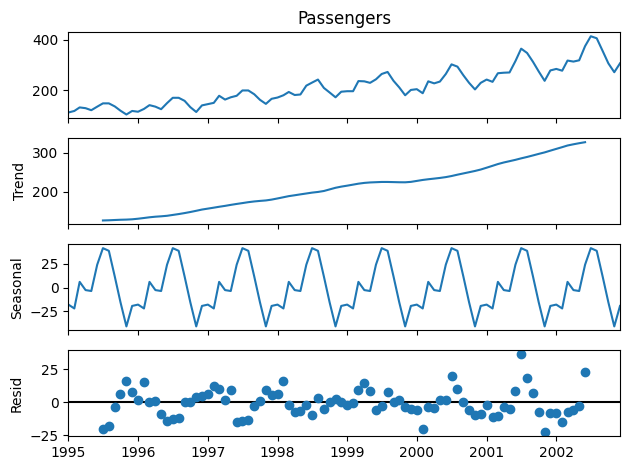

In [22]:
decompose_ts_add=seasonal_decompose(airlines.Passengers,period=12,model='additive')
decompose_ts_add.plot()
plt.show()

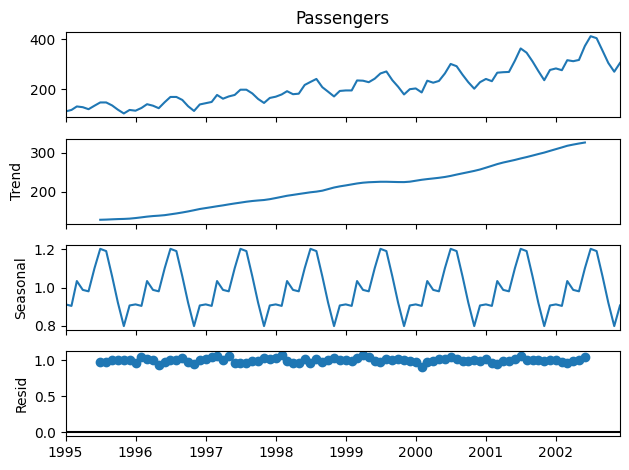

In [23]:
decompose_ts_add=seasonal_decompose(airlines['Passengers'],period=12,model='multiplicative')
decompose_ts_add.plot()
plt.show()

In [24]:
size=76
train=airlines[:size]
test=airlines[size:]

In [25]:
train

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-12-01,229
2001-01-01,242
2001-02-01,233


In [26]:
test

,Passengers
Date,
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284


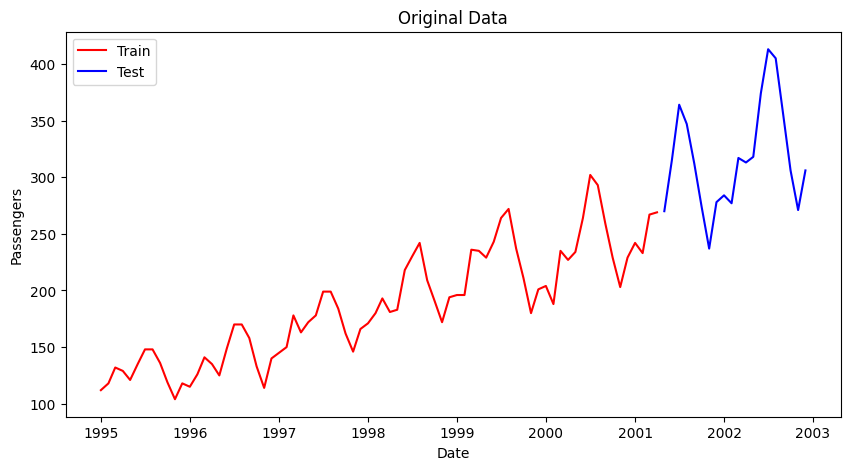

In [27]:
plt.figure(figsize=(10,5))
plt.xlabel("Date")
plt.ylabel('Passengers')
plt.title("Original Data")
plt.plot(train,color="red",label="Train")
plt.plot(test,color="blue",label="Test")
plt.legend(loc='best')
plt.show()

In [28]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

###Simple Exponential Smoothing

In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from math import sqrt
from sklearn.metrics import mean_squared_error
ses_model=SimpleExpSmoothing(train['Passengers']).fit(optimized=True)
test_pred_ses=ses_model.forecast(20)
train_pred_ses=ses_model.fittedvalues
test_rmse_value=sqrt(mean_squared_error(test_pred_ses,test['Passengers']))
train_rmse_value=sqrt(mean_squared_error(train_pred_ses,train))
mape_ses=MAPE(test_pred_ses,test['Passengers'])
print(f"Mean absolute Percent Error {mape_ses}")
print(f"Train root mean squared value {train_rmse_value}")
print(f"Test root mean squared value {test_rmse_value}")

Mean absolute Percent Error 14.717178698048318
Train root mean squared value 19.018342993000044
Test root mean squared value 66.15512076059656


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


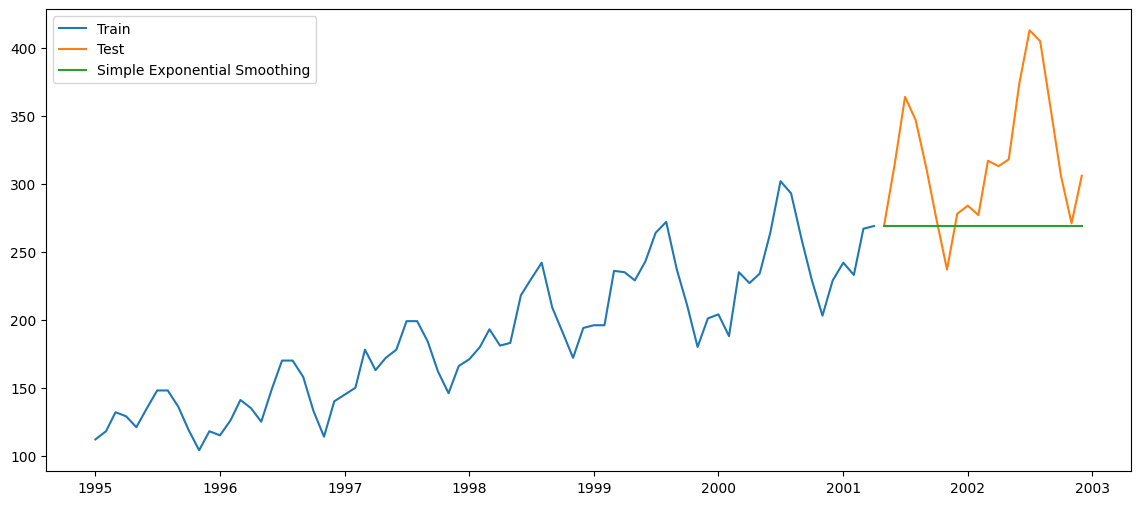

In [30]:
plt.figure(figsize=(14,6))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing")
plt.legend()
plt.show()

###Double Exponential Smoothing- Holts Method

In [31]:
from statsmodels.tsa.holtwinters import Holt
des_model=Holt(train).fit(optimized=True)
test_pred_des=des_model.forecast(20)
train_pred_des=des_model.fittedvalues
test_rmse_des=sqrt(mean_squared_error(test_pred_des,test['Passengers']))
train_rmse_des=sqrt(mean_squared_error(train_pred_des,train['Passengers']))
mape_des=MAPE(test_pred_ses,test['Passengers'])
print(f"Mean absolute Percent Error {mape_des}")
print(f"Train root mean squared value {train_rmse_des}")
print(f"Test root mean squared value {test_rmse_des}")

Mean absolute Percent Error 14.717178698048318
Train root mean squared value 19.20767752162923
Test root mean squared value 46.18643485850761


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


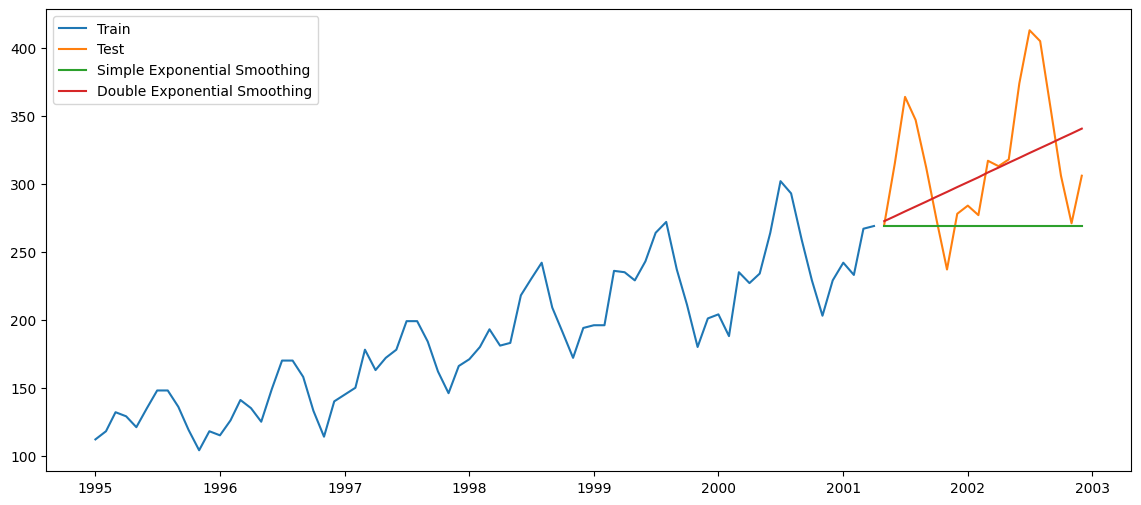

In [32]:
plt.figure(figsize=(14,6))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing")
plt.plot(test_pred_des,label="Double Exponential Smoothing")
plt.legend()
plt.show()

###Holt Winters Method with additive Seasonality and Trend(Triple Exponential)

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
texp_add_model=ExponentialSmoothing(train,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_texp_add_model=texp_add_model.forecast(20)
train_texp_add_model=texp_add_model.fittedvalues
test_rmse_ad_texp=sqrt(mean_squared_error(test_texp_add_model,test ))
train_rmse_ad_texp=sqrt(mean_squared_error(train_texp_add_model,train))
mape_add_texp=MAPE(test_texp_add_model,test.Passengers)
print(f'Triple Exponential Smoothing or HoltWinters Method')
print(f'ROOT MEAN SQUARED ERROR FOR TRAIN DATA IS {train_rmse_ad_texp}')
print(f'ROOT MEAN SQUARED ERROR FOR THE TEST DATA IS {test_rmse_ad_texp}')
print(f'MEAN ABSOLUTE PERCENTAGE ERROR FOR TEST DATA IS {mape_add_texp}')

Triple Exponential Smoothing or HoltWinters Method
ROOT MEAN SQUARED ERROR FOR TRAIN DATA IS 7.813467948384908
ROOT MEAN SQUARED ERROR FOR THE TEST DATA IS 37.7325184683014
MEAN ABSOLUTE PERCENTAGE ERROR FOR TEST DATA IS 8.724206745976666


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


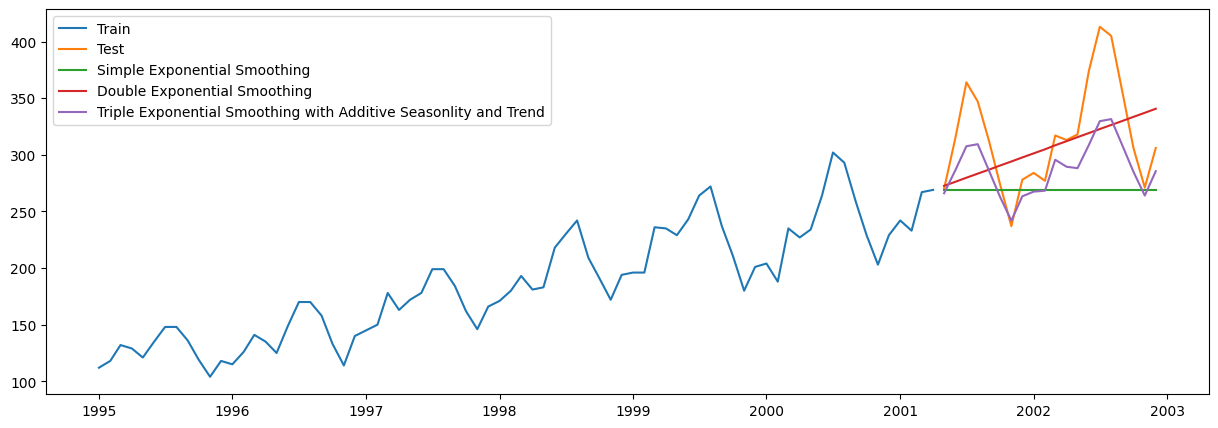

In [34]:
plt.figure(figsize=(15,5))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing")
plt.plot(test_pred_des,label="Double Exponential Smoothing")
plt.plot(test_texp_add_model,label="Triple Exponential Smoothing with Additive Seasonlity and Trend")
plt.legend(loc="best")
plt.show()

###HoltWinters Method (Triple Exponential Smoothing) with Multiplicative Seasonality and Additive Trend

In [35]:
texp_mul_add_model=ExponentialSmoothing(train,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_texp_pred_mul_add=texp_mul_add_model.forecast(20)
train_texp_pred_mul_add=texp_mul_add_model.fittedvalues
test_rmse_mul_add_texp=sqrt(mean_squared_error(test_texp_pred_mul_add,test))
train_rmse_mul_add_texp=sqrt(mean_squared_error(train_texp_pred_mul_add,train))
mape_texp_mul_add_texp=MAPE(test_texp_pred_mul_add,test.Passengers)
print("Triple Exponential Smoothing with Multiplicative Seasonality and Additive Trend")
print(f'MAPE {mape_texp_mul_add_texp}')
print(f'TEST RMSE {test_rmse_mul_add_texp}')
print(f'TRAIN RMSE {train_rmse_mul_add_texp}')

Triple Exponential Smoothing with Multiplicative Seasonality and Additive Trend
MAPE 9.375576393235455
TEST RMSE 33.878136662990336
TRAIN RMSE 6.442069826765842


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


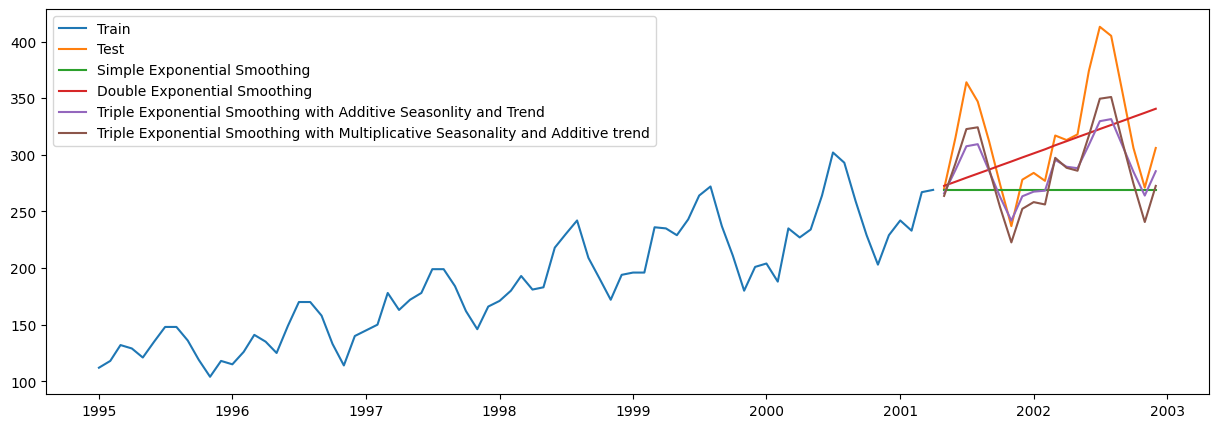

In [36]:
plt.figure(figsize=(15,5))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing")
plt.plot(test_pred_des,label="Double Exponential Smoothing")
plt.plot(test_texp_add_model,label="Triple Exponential Smoothing with Additive Seasonlity and Trend")
plt.plot(test_texp_pred_mul_add,label="Triple Exponential Smoothing with Multiplicative Seasonality and Additive trend")

plt.legend(loc="best")
plt.show()

###Triple Exponential smoothing with Multiplicative seasonlity and Multiplicative Trend

In [37]:
texp_mul_mul_model=ExponentialSmoothing(train,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_mul=texp_mul_mul_model.forecast(20)
train_pred_mul_mul=texp_mul_mul_model.fittedvalues
test_mul_mul_rmse=sqrt(mean_squared_error(test_pred_mul_mul,test.Passengers))
train_mul_mul_rmse=sqrt(mean_squared_error(train_pred_mul_mul,train.Passengers))
mape_mul_mul=MAPE(test_pred_mul_mul,test.Passengers)
print(f'MAPE {mape_mul_mul}')
print(f'Train RMSE {train_mul_mul_rmse}')
print(f'Test RMSE {test_mul_mul_rmse}')


MAPE 6.262058674493239
Train RMSE 6.44522963680336
Test RMSE 23.457626547015344


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


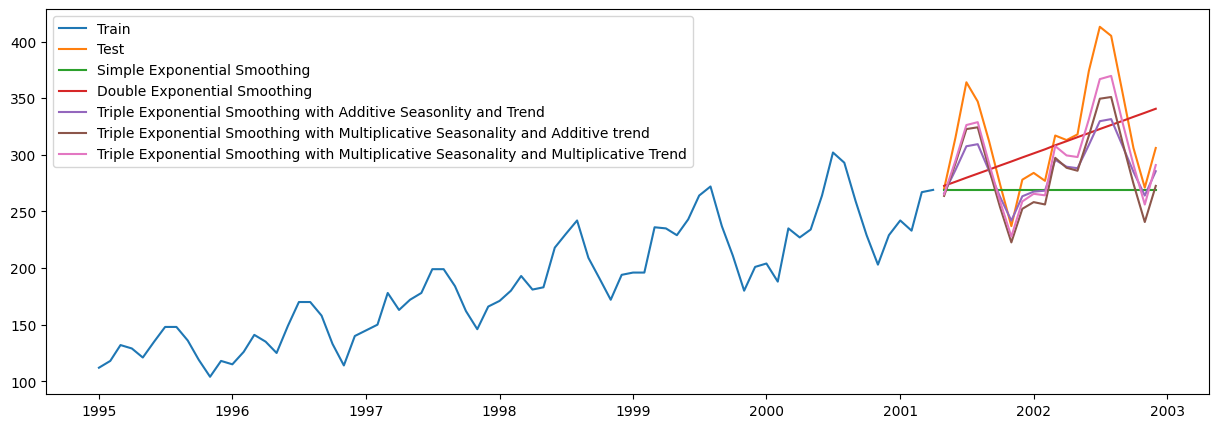

In [38]:
plt.figure(figsize=(15,5))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing")
plt.plot(test_pred_des,label="Double Exponential Smoothing")
plt.plot(test_texp_add_model,label="Triple Exponential Smoothing with Additive Seasonlity and Trend")
plt.plot(test_texp_pred_mul_add,label="Triple Exponential Smoothing with Multiplicative Seasonality and Additive trend")
plt.plot(test_pred_mul_mul,label="Triple Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend")
plt.legend(loc="best")
plt.show()

###Triple Exponential Smoothing with Additive Seasonality and Multiplicative Trend

In [39]:
texp_mul_add_model=ExponentialSmoothing(train,seasonal="add",trend="mul",seasonal_periods=12).fit(optimized=True)
test_mul_add=texp_mul_add_model.forecast(20)
train_mul_add=texp_mul_add_model.fittedvalues
test_mul_add_rmse=sqrt(mean_squared_error(test_mul_add,test.Passengers))
train_mul_add_rmse=sqrt(mean_squared_error(train_mul_add,train.Passengers))
mape_mul_add=MAPE(test_mul_add,test.Passengers)
print(f'MAPE is {mape_mul_add}')
print(f'Train RMSE is {train_mul_add_rmse}')
print(f'Test RMSE is {test_mul_add_rmse}')

MAPE is 6.543208276226944
Train RMSE is 7.831427754467492
Test RMSE is 30.785674842825586


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


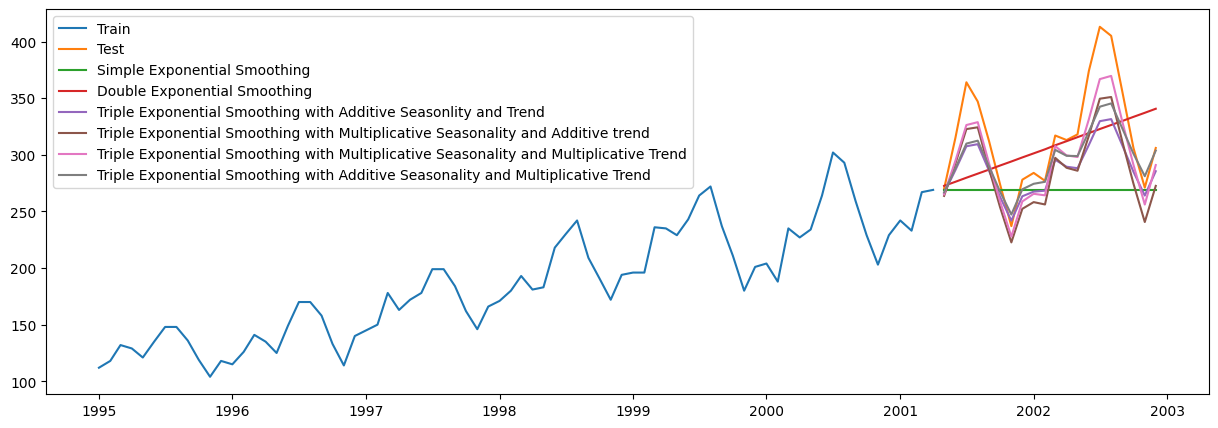

In [40]:
plt.figure(figsize=(15,5))
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.plot(test_pred_ses,label="Simple Exponential Smoothing")
plt.plot(test_pred_des,label="Double Exponential Smoothing")
plt.plot(test_texp_add_model,label="Triple Exponential Smoothing with Additive Seasonlity and Trend")
plt.plot(test_texp_pred_mul_add,label="Triple Exponential Smoothing with Multiplicative Seasonality and Additive trend")
plt.plot(test_pred_mul_mul,label="Triple Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend")
plt.plot(test_mul_add,label="Triple Exponential Smoothing with Additive Seasonality and Multiplicative Trend")
plt.legend(loc="best")
plt.show()

In [41]:
Evaluation={"Models" : pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exponential_Add","Triple_Exp_Mul_Add","Triple_Exp_Mul_Mul","Triple_Exp_Add_Mul"]),
            "Test_RMSE":pd.Series([test_rmse_value,test_rmse_des,test_rmse_ad_texp,test_rmse_mul_add_texp,test_mul_mul_rmse,test_mul_add_rmse]),
            "Train_RMSE":pd.Series([train_rmse_value,train_rmse_des,train_rmse_ad_texp,train_rmse_mul_add_texp,train_mul_mul_rmse,train_mul_add_rmse]),
            "Test_MAPE":pd.Series([mape_ses,mape_des,mape_add_texp,mape_texp_mul_add_texp,mape_mul_mul,mape_mul_add])
            }


In [42]:
table=pd.DataFrame(Evaluation)
table.sort_values(['Test_MAPE'],ascending=True)
table

,Models,Test_RMSE,Train_RMSE,Test_MAPE
0,Simple_Exponential,66.155121,19.018343,14.717179
1,Double_Exponential,46.186435,19.207678,14.717179
2,Triple_Exponential_Add,37.732518,7.813468,8.724207
3,Triple_Exp_Mul_Add,33.878137,6.442070,9.375576
4,Triple_Exp_Mul_Mul,23.457627,6.445230,6.262059
5,Triple_Exp_Add_Mul,30.785675,7.831428,6.543208


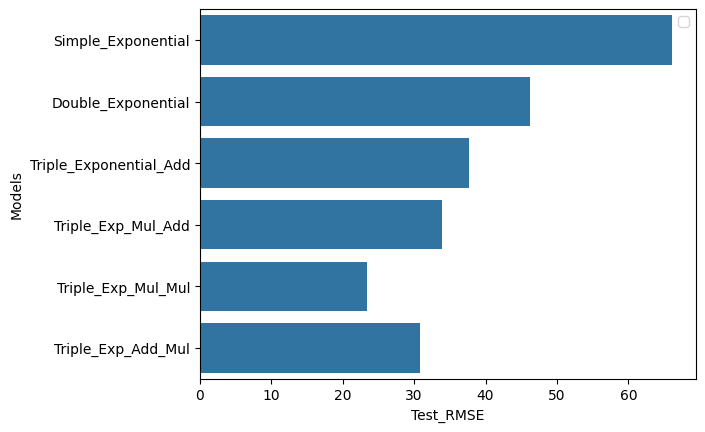

In [43]:

import seaborn as sns
sns.barplot(x="Test_RMSE",y="Models",data=table)
plt.legend()
plt.show()

###Test For Stationarity

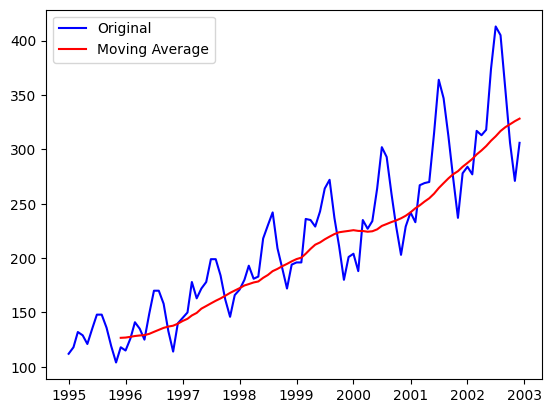

Result of Augmented Dickey Fuller Test (ADF)
(1.3402479596467138, 0.9968250481137263, 12, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 626.0084713813505)


In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  movingavg=timeseries.rolling(window=12).mean()
  movingstd=timeseries.rolling(window=12).std()
  orig=plt.plot(timeseries,color="blue",label="Original")
  mean=plt.plot(movingavg,color="red",label="Moving Average")
  plt.legend(loc="best")
  plt.show()

  print("Result of Augmented Dickey Fuller Test (ADF)")
  adftest= adfuller(timeseries['Passengers'],autolag="AIC")
  print(adftest)
test_stationarity(airlines)

In [45]:
p_value=0.9968250481137263
if p_value<0.05:
  print("Reject Null Hypothesis")
  print("Data is Stationary")
else:
  print("Accept Null Hypothesis")
  print("Data is non stationary")

Accept Null Hypothesis
Data is non stationary


###Differencing

In [46]:

airlines

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [47]:
airlines.shift(1)

,Passengers
Date,
1995-01-01,NaN
1995-02-01,112.0
1995-03-01,118.0
1995-04-01,132.0
1995-05-01,129.0
...,...
2002-08-01,413.0
2002-09-01,405.0
2002-10-01,355.0


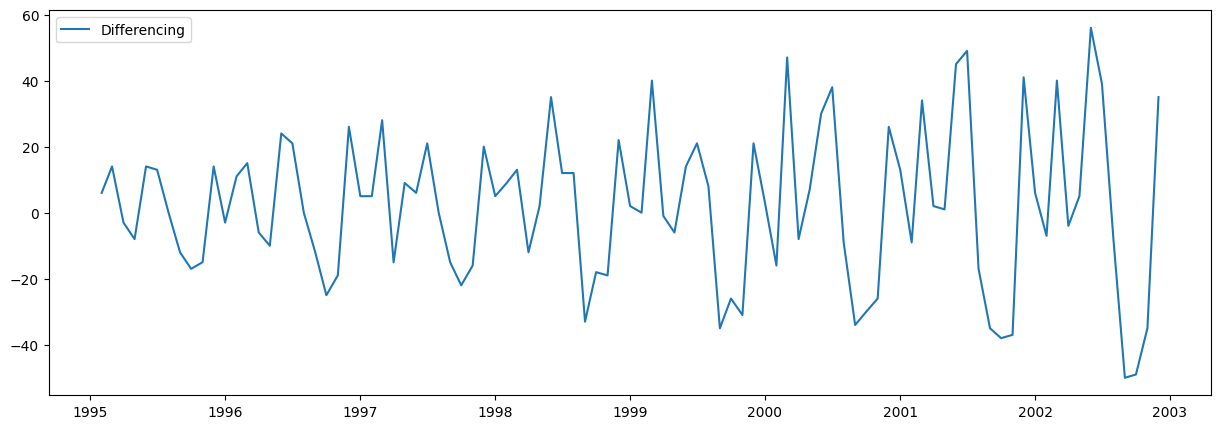

In [48]:
differencing=airlines-airlines.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(15,5))
plt.plot(differencing,label="Differencing")
plt.legend(loc="best")
plt.show()

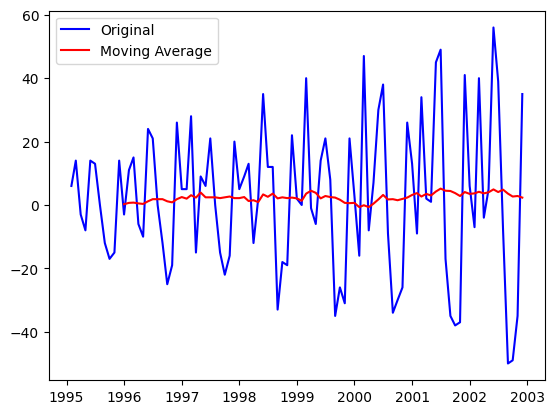

Result of Augmented Dickey Fuller Test (ADF)
(-2.1500017359206374, 0.22488942647513177, 12, 82, {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}, 613.1127223022611)


In [49]:
test_stationarity(differencing)

In [50]:
p_value=0.22488942647513177
if p_value<0.05:
  print("Reject Null Hypothesis")
  print("Data is Stationary")
else:
  print("Accept Null Hypothesis")
  print("Data is non stationary")

Accept Null Hypothesis
Data is non stationary


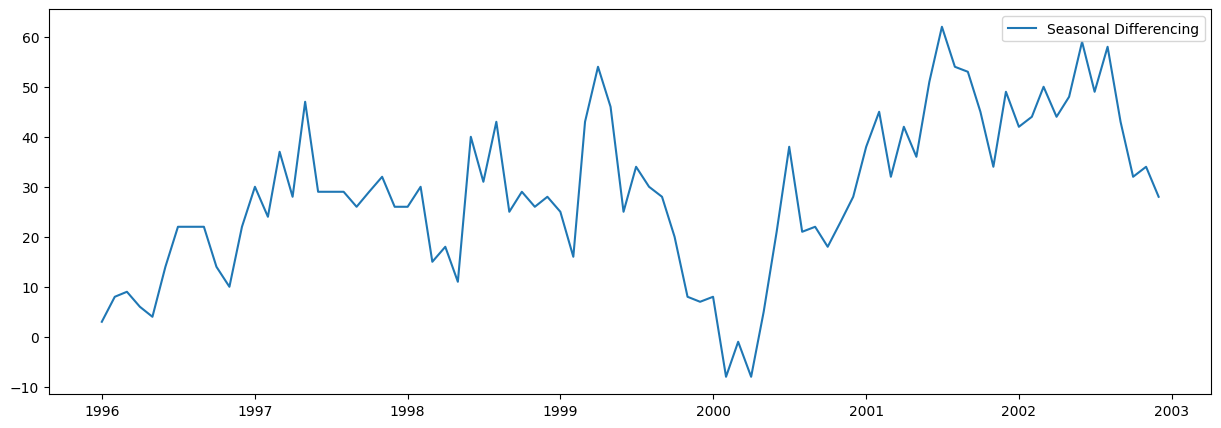

In [51]:
#for a seasonal differencing

differencing=airlines-airlines.shift(12)
differencing.dropna(inplace=True)
plt.figure(figsize=(15,5))
plt.plot(differencing,label="Seasonal Differencing")
plt.legend(loc="best")
plt.show()


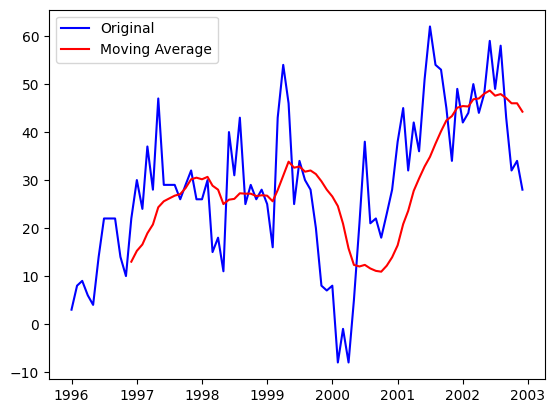

Result of Augmented Dickey Fuller Test (ADF)
(-2.6900043838623158, 0.07578397625851772, 1, 82, {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}, 531.1060746991411)


In [52]:
test_stationarity(differencing)


In [53]:
p_value=0.07578397625851772
if p_value<0.05:
  print("Reject Null Hypothesis")
  print("Data is Stationary")
else:
  print("Accept Null Hypothesis")
  print("Data is non stationary")

Accept Null Hypothesis
Data is non stationary


In [54]:
data_diff=airlines-airlines.shift()
data_diff=data_diff.dropna()
train_diff=data_diff[:size]
test_diff=data_diff[size:]

In [55]:
train_diff

,Passengers
Date,
1995-02-01,6.0
1995-03-01,14.0
1995-04-01,-3.0
1995-05-01,-8.0
1995-06-01,14.0
...,...
2001-01-01,13.0
2001-02-01,-9.0
2001-03-01,34.0


In [56]:
from statsmodels.tsa.arima.model import ARIMA
def eval_arima(X,arima_order):
  X=X.astype("float32")
  train_size=int(len(X)*0.8)
  train,test=X[:train_size],X[train_size:]
  history=[x for x in train]

  predictions=list()
  for t in range(len(test)):

    try:
      model=ARIMA(history,order=arima_order)
      model_fit=model.fit()
      yhat=model_fit.forecast()[0]
      predictions.append(yhat)
      history.append(test[t])
    except Exception as e:
      print(f'{e}')
      continue

  rmse=sqrt(mean_squared_error(test,predictions))
  return rmse

def evaluate_models(dataset,p_vals,d_vals,q_vals):
  dataset=dataset.astype('float32')
  best_score,best_cfg=float('inf'),None
  for p in p_vals:
    for d in d_vals:
      for q in  q_vals:
        order=(p,d,q)

        try:
          rmse=eval_arima(dataset,order)
          if rmse<best_score:
            best_score=rmse
            best_cfg=order
        except Exception as e:
          print(f'Error Occured {e}')
          continue
  print(f'Best RMSE of ARIME is {best_score} for the ARIMA order {best_cfg}')


In [57]:
import warnings
p_vals=range(0,5)
q_vals=range(0,5)
d_vals=range(0,5)
warnings.filterwarnings("ignore")
evaluate_models(train.Passengers, p_vals, d_vals, q_vals)

LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
Error Occured Found input variables with inconsistent numbers of samples: [16, 1]
Best RMSE of ARIME is 22.30062347853768 for the ARIMA order (4, 1, 3)


In [58]:
#Best RMSE of ARIMA is 22.30062347853768 for the ARIMA order (4, 1, 3)

In [59]:
model=ARIMA(train_diff,order=(4,1,3))
model_fit=model.fit()
yhat_ar=data_diff.copy()
yhat_ar['arima_forecast']=model_fit.predict(data_diff.index.min(),data_diff.index.max())
yhat_ar['arima_forecast']=yhat_ar['arima_forecast'].cumsum()
yhat_ar['arima_forecast']=yhat_ar['arima_forecast'].add(airlines.Passengers[0])

In [60]:
yhat_ar

,Passengers,arima_forecast
Date,,
1995-02-01,6.0,112.000000
1995-03-01,14.0,117.998866
1995-04-01,-3.0,129.447512
1995-05-01,-8.0,131.104643
1995-06-01,14.0,130.339423
...,...,...
2002-08-01,-8.0,296.718938
2002-09-01,-50.0,290.873986
2002-10-01,-49.0,298.543990


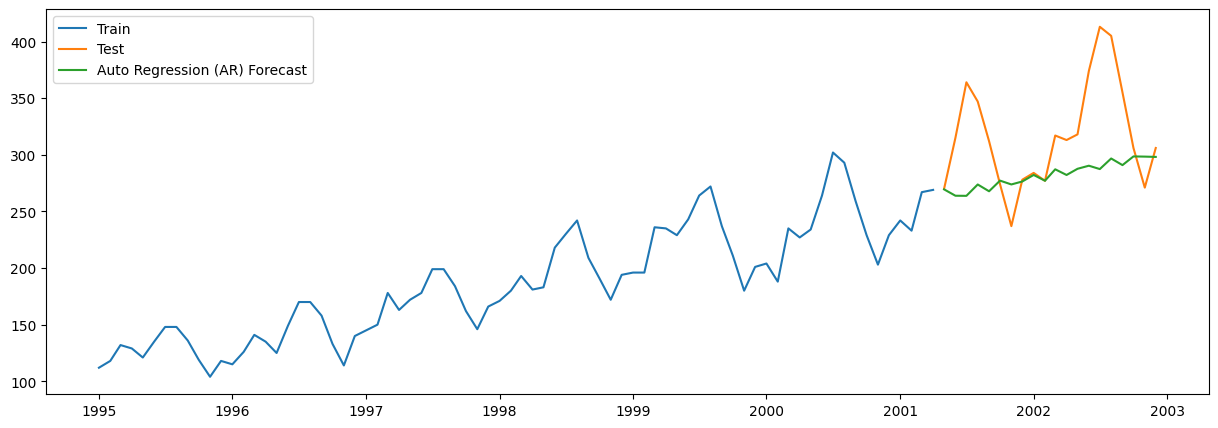

In [61]:
plt.figure(figsize=(15,5))
plt.plot(train['Passengers'],label="Train")
plt.plot(test['Passengers'],label="Test")
plt.plot(yhat_ar['arima_forecast'][test.index.min():],label="Auto Regression (AR) Forecast")
plt.legend(loc="best")
plt.show()

In [62]:
rmse_arima=np.sqrt(mean_squared_error(test,yhat_ar['arima_forecast'][test.index.min():])).round(2)
rmse_arima

56.39

In [63]:
mape_arima=MAPE(yhat_ar['arima_forecast'][test.index.min():],test.Passengers)
mape_arima

11.935436394220742

In [64]:
model_resid=model_fit.resid
model_resid.mean()

0.007352834807918584

In [65]:
adfuller(model_resid)

(-2.4893358925809355,
 0.11809062511582724,
 12,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 475.93462408712566)

In [66]:
p_value=0.11809062511582724
if p_value<0.05:
  print("Reject Null Hypothesis")
  print("Data is Stationary")
else:
  print("Accept Null Hypothesis")
  print("Data is non stationary")

Accept Null Hypothesis
Data is non stationary


<Axes: xlabel='Date'>

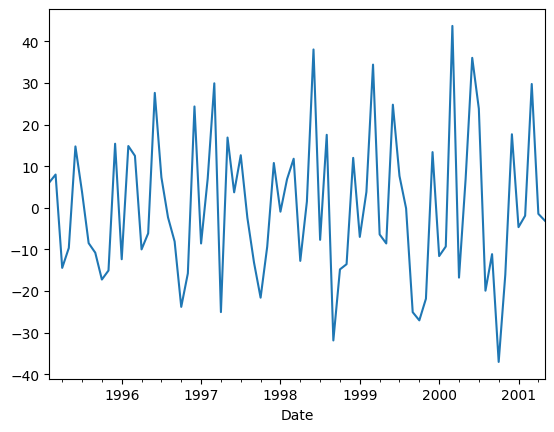

In [67]:
model_resid.plot()

###SARIMA Seasonal Order P=1,Q=1,D=1 and m=12.

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()
yhat_sarima=data_diff.copy()

In [69]:
yhat_sarima['Sarima_Forecast']=model_fit.predict(start=data_diff.index.min(),end=data_diff.index.max())

In [70]:
yhat_sarima

,Passengers,Sarima_Forecast
Date,,
1995-02-01,6.0,111.998407
1995-03-01,14.0,118.000887
1995-04-01,-3.0,131.999021
1995-05-01,-8.0,129.000718
1995-06-01,14.0,120.999782
...,...,...
2002-08-01,-8.0,347.352164
2002-09-01,-50.0,312.873356
2002-10-01,-49.0,284.354952


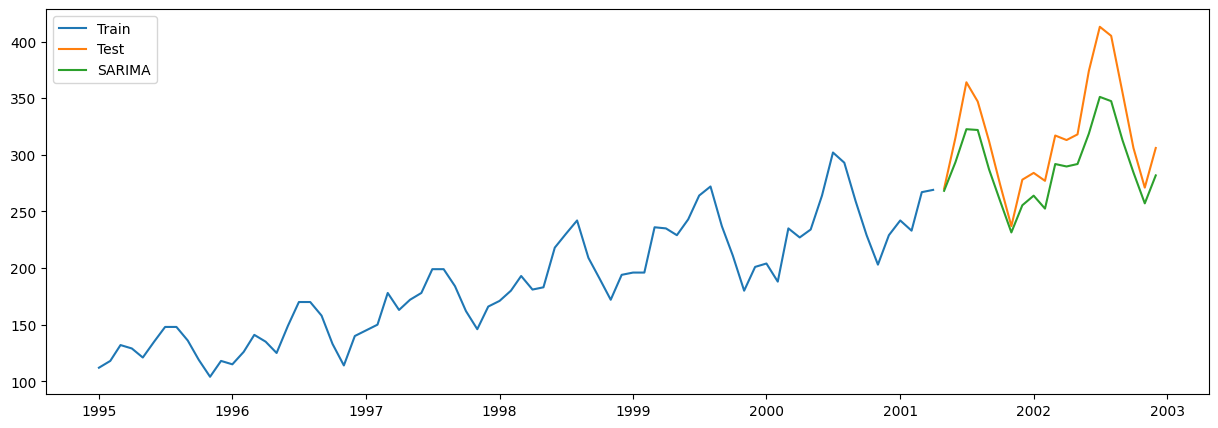

In [71]:
plt.figure(figsize=(15,5))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(yhat_sarima['Sarima_Forecast'][test.index.min():],label="SARIMA")
plt.legend(loc="best")
plt.show()

In [72]:
rmse_sarima=np.sqrt(mean_squared_error(test,yhat_sarima['Sarima_Forecast'][test.index.min():])).round(2)
rmse_sarima

31.86

In [73]:
mape_sarima=MAPE(yhat_sarima['Sarima_Forecast'],test.Passengers)
mape_sarima

8.273933455278183

In [74]:
model_resid=model_fit.resid
model_resid.mean()

1.2930782951306807

In [75]:
adfuller(model_resid)

(-12.814760520009672,
 6.3350053863804564e-24,
 0,
 75,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 459.9748079519484)

In [76]:
p_value=6.3350053863804564e-24
if p_value<0.05:
  print("Reject Null Hypothesis")
  print("Data is Stationary")
else:
  print("Accept Null Hypothesis")
  print("Data is non stationary")

Reject Null Hypothesis
Data is Stationary


In [77]:
Evaluation={"Models" : pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exponential_Add","Triple_Exp_Mul_Add","Triple_Exp_Mul_Mul","Triple_Exp_Add_Mul","ARIMA","SARIMA"]),
            "RMSE":pd.Series([test_rmse_value,test_rmse_des,test_rmse_ad_texp,test_rmse_mul_add_texp,test_mul_mul_rmse,test_mul_add_rmse,rmse_arima,rmse_sarima]),

            "MAPE":pd.Series([mape_ses,mape_des,mape_add_texp,mape_texp_mul_add_texp,mape_mul_mul,mape_mul_add,mape_arima,mape_sarima])
            }


In [78]:
table=pd.DataFrame(Evaluation)

In [79]:
table

,Models,RMSE,MAPE
0,Simple_Exponential,66.155121,14.717179
1,Double_Exponential,46.186435,14.717179
2,Triple_Exponential_Add,37.732518,8.724207
3,Triple_Exp_Mul_Add,33.878137,9.375576
4,Triple_Exp_Mul_Mul,23.457627,6.262059
5,Triple_Exp_Add_Mul,30.785675,6.543208
6,ARIMA,56.390000,11.935436
7,SARIMA,31.860000,8.273933


In [80]:
table.sort_values(["RMSE"],inplace=True)

In [81]:
table

,Models,RMSE,MAPE
4,Triple_Exp_Mul_Mul,23.457627,6.262059
5,Triple_Exp_Add_Mul,30.785675,6.543208
7,SARIMA,31.860000,8.273933
3,Triple_Exp_Mul_Add,33.878137,9.375576
2,Triple_Exponential_Add,37.732518,8.724207
1,Double_Exponential,46.186435,14.717179
6,ARIMA,56.390000,11.935436
0,Simple_Exponential,66.155121,14.717179


<Axes: xlabel='RMSE', ylabel='Models'>

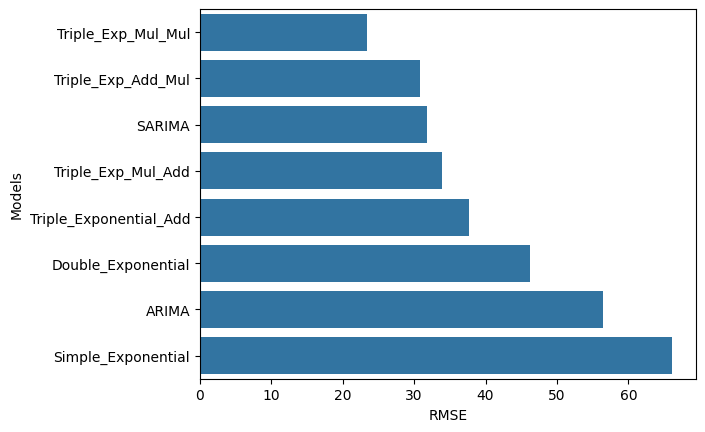

In [82]:
sns.barplot(x="RMSE",y="Models",data=table)

###The Holt Winters Method with multiplicative Trend and Seasonality performs the best with lowest RMSE and MAPE
